### The Cats_and_Dogs_Dataset used and implemented in six models

0) VGG-16

1) AlexNet

2) GoogleNet

3) ResNet50

4)EfficientNetB0

5) MobileNetV2

**1) Download the dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-03-20 11:13:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   140MB/s    in 0.5s    

2023-03-20 11:13:33 (140 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**Model = VGG-16**

**2) Extract the dataset**

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**3) Split the data**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [6]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.918.jpg', 'cat.535.jpg', 'cat.108.jpg', 'cat.971.jpg', 'cat.553.jpg', 'cat.291.jpg', 'cat.966.jpg', 'cat.269.jpg', 'cat.556.jpg', 'cat.793.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


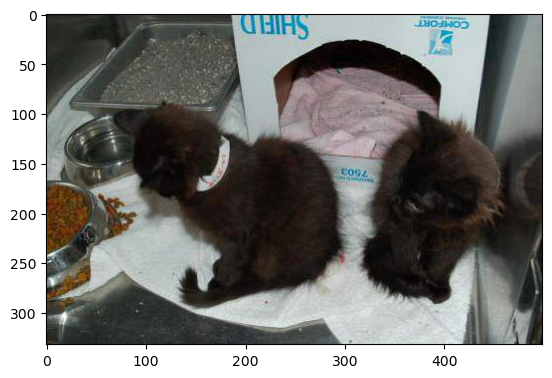

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[2])))

**4) Import the VGG-16 model**

In [9]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**5) Add new layers and compile the model for the new dataset** 



In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


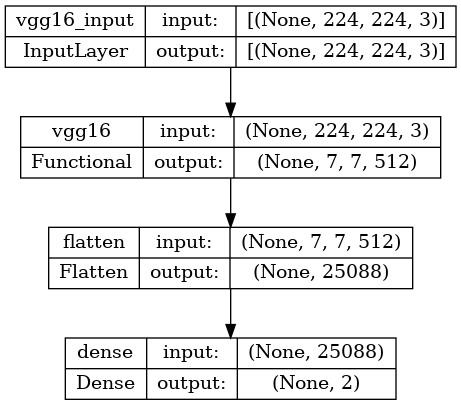

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

**6) Train the model**

In [12]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 26s 150ms/step - loss: 0.4626 - acc: 0.7820 - val_loss: 0.3389 - val_acc: 0.8700
Epoch 2/2
100/100 [==============================] - 15s 148ms/step - loss: 0.2715 - acc: 0.9105 - val_loss: 0.2755 - val_acc: 0.8880


**Model 1: Alexnet**

In [13]:
import keras
from keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

In [14]:
model1=tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(227,227,3)))
#1st
model1.add(tf.keras.layers.Conv2D(kernel_size=(11,11),activation="relu",padding="valid",strides=(4,4),filters=96))
model1.add(tf.keras.layers.MaxPooling2D(strides=(2,2),pool_size=(2,2),padding="valid"))
#2nd
model1.add(tf.keras.layers.Conv2D(kernel_size=(5,5),activation="relu",padding="valid",strides=(1,1),filters=256))
model1.add(tf.keras.layers.MaxPooling2D(strides=(2,2),pool_size=(3,3),padding="valid"))
#3rd
model1.add(tf.keras.layers.Conv2D(kernel_size=(3,3),activation="relu",padding="same",strides=(1,1),filters=384))
#4th
model1.add(tf.keras.layers.Conv2D(kernel_size=(3,3),activation="relu",padding="same",strides=(1,1),filters=384))
#5th
model1.add(tf.keras.layers.Conv2D(kernel_size=(3,3),activation="relu",padding="valid",strides=(1,1),filters=256))
model1.add(tf.keras.layers.MaxPooling2D(strides=(2,2),pool_size=(3,3),padding="valid"))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(4096,activation="relu",name="HiddenLayer1",input_shape=(224,224,3)))
model1.add(tf.keras.layers.Dense(4096,activation="relu",name="HiddenLayer2"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid",name="HiddenLayer3"))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 384)      

In [15]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model1.fit(train_generator, epochs=2, validation_data=validation_generator )


Epoch 1/2
100/100 [==============================] - 16s 113ms/step - loss: 0.7870 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/2
100/100 [==============================] - 11s 111ms/step - loss: 0.6934 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000


**Model 2: Googlenet**

In [16]:
from keras.applications.inception_v3 import InceptionV3

base_model2 =  InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

base_model2.trainable = False #freeze the layers

base_model2.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 alization)           

In [17]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
history = model2.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 20s 146ms/step - loss: 0.1348 - acc: 0.9555 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 2/2
100/100 [==============================] - 12s 123ms/step - loss: 0.0131 - acc: 0.9970 - val_loss: 0.0536 - val_acc: 0.9860


In [19]:
model2.evaluate(train_generator)

100/100 [==============================] - 8s 78ms/step - loss: 0.0040 - acc: 1.0000


[0.003955083899199963, 1.0]

**Model 3:ResNet50**

In [20]:
base_model3 = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [21]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
history = model3.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 18s 145ms/step - loss: 0.7038 - acc: 0.5685 - val_loss: 0.6699 - val_acc: 0.5990
Epoch 2/2
100/100 [==============================] - 13s 134ms/step - loss: 0.6638 - acc: 0.6195 - val_loss: 0.6220 - val_acc: 0.6470


**Model 4 : EfficentNet B0**

In [23]:
base_model4 = tf.keras.applications.EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescal

In [24]:
import tensorflow as tf
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [25]:
history = model4.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2


2023-03-20 11:16:52.894004: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100/100 [==============================] - 20s 140ms/step - loss: 0.7589 - acc: 0.4960 - val_loss: 0.7375 - val_acc: 0.5000
Epoch 2/2
100/100 [==============================] - 13s 127ms/step - loss: 0.7134 - acc: 0.5260 - val_loss: 0.7408 - val_acc: 0.5000


**Model 5: MobileNetV2**

In [26]:
base_model5 = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [27]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
history = model5.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 16s 128ms/step - loss: 0.1552 - acc: 0.9485 - val_loss: 0.0747 - val_acc: 0.9750
Epoch 2/2
100/100 [==============================] - 12s 124ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0728 - val_acc: 0.9800


**Analyzing Performance** 

In [29]:
#VGG-16
model.evaluate(train_generator)

100/100 [==============================] - 11s 108ms/step - loss: 0.2221 - acc: 0.9325


[0.2221490889787674, 0.9325000047683716]

In [30]:
#AlexNet
model1.evaluate(train_generator)

100/100 [==============================] - 8s 75ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931472420692444, 0.5]

In [31]:
#Googlenet
model2.evaluate(train_generator)

100/100 [==============================] - 8s 79ms/step - loss: 0.0040 - acc: 1.0000


[0.003955083899199963, 1.0]

In [32]:
#ResNet50
model3.evaluate(train_generator)

100/100 [==============================] - 9s 90ms/step - loss: 0.5962 - acc: 0.6805


[0.5962254405021667, 0.6804999709129333]

In [33]:
#EfficientNetB0
model4.evaluate(train_generator)

100/100 [==============================] - 8s 84ms/step - loss: 0.7408 - acc: 0.5000


[0.7408452033996582, 0.5]

In [34]:
# MobileNetV2
model5.evaluate(train_generator)

100/100 [==============================] - 8s 78ms/step - loss: 0.0015 - acc: 1.0000


[0.0014701877953484654, 1.0]